In [56]:
sys.path.append("/projects/hochmeister/MONet_pytorch")

In [57]:
sys.argv = [sys.argv[0]]
sys.argv.append("--dataroot=")
sys.argv.append("--name=clevr_monet_pretrained")
sys.argv.append("--model=monet")
sys.argv.append("--phase=test")

In [58]:
from models import create_model
from data import  create_dataset
from options.test_options import TestOptions
from util.visualizer import save_images
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.io import read_video
import torchvision.transforms.functional as TF

In [59]:
opt = TestOptions().parse()

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 64                            
          checkpoints_dir: /projects/hochmeister/MONet_pytorch/checkpoints
                crop_size: 192                           
                 dataroot:                               	[default: None]
             dataset_mode: clevr                         
                direction: AtoB                          
            display_ncols: 11                            
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 6                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                       

In [60]:
opt.num_threads = 0   # test code only supports num_threads = 1
opt.batch_size = 1    # test code only supports batch_size = 1
opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
    

In [61]:
model = create_model(opt)
model.setup(opt)

initialize network with normal
initialize network with normal
model [MONetModel] was created
loading the model from /projects/hochmeister/MONet_pytorch/checkpoints/clevr_monet_pretrained/latest_net_Attn.pth
loading the model from /projects/hochmeister/MONet_pytorch/checkpoints/clevr_monet_pretrained/latest_net_CVAE.pth
---------- Networks initialized -------------
[Network Attn] Total number of parameters : 13.926 M
[Network CVAE] Total number of parameters : 0.370 M
-----------------------------------------------


Read data


In [62]:
video_path = "/projects/hochmeister/CATER-videos/videos/CATER_new_000005.avi"
frames, _, _ = read_video(video_path)
example_image = frames[0].cpu()


RuntimeError: File not found: /projects/hochmeister/CATER-videos/videos/CATER_new_000004.avi

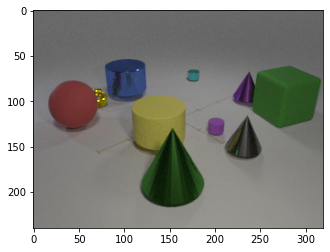

In [ ]:
plt.imshow(example_image)

In [ ]:
example_image = example_image.permute(2, 0, 1)

In [ ]:
example_image.shape

torch.Size([3, 240, 320])

Resize and normalize image

In [ ]:
opt.crop_size = 240

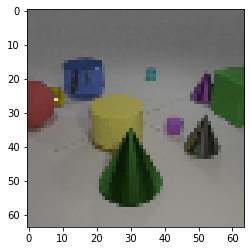

In [ ]:
cropped_image = TF.resized_crop(example_image, 0, 40, opt.crop_size, opt.crop_size, opt.load_size)
plt.imshow(cropped_image.permute(1,2,0))

In [ ]:
cropped_image = cropped_image / 255
#cropped_image = cropped_image.type(torch.float)
cropped_normalized_image = TF.normalize(cropped_image, [0.5] * opt.input_nc, [0.5] * opt.input_nc)
        

Cropped and normalized image

In [ ]:
cropped_normalized_image[0]

tensor([[-0.1686, -0.1765, -0.1608,  ..., -0.1843, -0.1843, -0.1922],
        [-0.1765, -0.1843, -0.1765,  ..., -0.1922, -0.1922, -0.1765],
        [-0.1765, -0.1686, -0.1608,  ..., -0.1922, -0.1843, -0.1843],
        ...,
        [ 0.0353,  0.0353,  0.0510,  ...,  0.1373,  0.1373,  0.1373],
        [ 0.0431,  0.0588,  0.0510,  ...,  0.1451,  0.1529,  0.1373],
        [ 0.0510,  0.0588,  0.0588,  ...,  0.1529,  0.1373,  0.1373]])

In [ ]:
batch = cropped_normalized_image.unsqueeze(0)
batch.shape

torch.Size([1, 3, 64, 64])

In [ ]:
data = {'A': batch, 'A_paths': ['']}

In [ ]:
model.set_input(data)
model.test()

In [ ]:
visual = model.get_current_visuals()
img_path = model.get_image_paths()


In [ ]:
visual.keys()

odict_keys(['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'xm0', 'xm1', 'xm2', 'xm3', 'xm4', 'xm5', 'xm6', 'xm7', 'xm8', 'xm9', 'xm10', 'x', 'x_tilde'])

Results

In [ ]:
from util.util import tensor2im
from util.visualizer import imresize
from IPython.display import display

In [ ]:
image = visual['x']

In [ ]:
image = tensor2im(image)
#image = imresize(image)

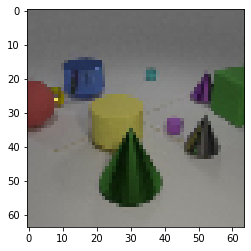

In [ ]:
plt.imshow(image)

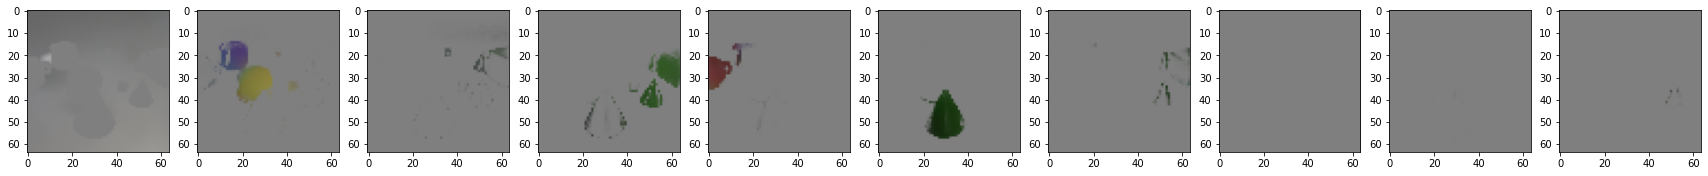

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,30))

for i in range(10):
    image = visual[f'xm{i}']
    image = tensor2im(image)
    #image = imresize(image)
    axs[i].imshow(image)
    #plt.imshow(image)

plt.show()